In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [6]:
base_dir = '../data/training_curves/base-training/'
downsample_dir = '../data/training_curves/downsampled-training/'

In [4]:
def plot_curves(df_dict, title, palette=None, fig_size=(18,16), save_dir=None):
    for df in df_dict.values():
        df.columns = ['wall_time', 'step', 'accuracy']
    fig = plt.figure(figsize=fig_size)
    if palette:
        colors_ = sn.color_palette(palette)[:5]
    else:
        colors_ = sn.color_palette('YlOrRd')[:5] + sn.color_palette('Blues')[:5]
    for idx, item in enumerate(df_dict.items()):
        label, df = item
        if idx == 0:
            sn.lineplot(data=df, x='step', y='accuracy', label=label, color='black')
        else:
            sn.lineplot(data=df, x='step', y='accuracy', label=label, color=colors_[idx-1])

    plt.legend(fontsize=13, loc='lower right')
    plt.title(title, fontsize=18)
    plt.xlabel('Step', fontsize=13)
    plt.ylabel('Accuracy', fontsize=13)
    if save_dir:
        save_file = save_dir + title + '.png'
        fig.savefig(save_file, dpi = fig.dpi, facecolor=(1,1,1,1))

In [7]:
italian_base = pd.read_csv(base_dir + 'italian_baseline_step.csv')
croatian_to_italian = pd.read_csv(base_dir + 'croatian-to-italian-train_accuracy.csv')
dutch_to_italian = pd.read_csv(base_dir + 'dutch_2italian.csv')
english_to_italian = pd.read_csv(base_dir + 'english-to-italian-train_accuracy.csv')
finnish_to_italian = pd.read_csv(base_dir + 'finnish-to-italian-train_accuracy.csv')
spanish_to_italian = pd.read_csv(base_dir + 'spanish-to-italian-train_accuracy.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_italian_acc = pd.read_csv(base_dir + 'italian_croatian_italian.csv')
spanish_italian_acc = pd.read_csv(base_dir + 'italian_spanish_italian.csv')
finnish_italian_acc = pd.read_csv(base_dir + 'italian_finnish_italian.csv')
english_italian_acc = pd.read_csv(base_dir + 'italian_english_italian.csv')
dutch_italian_acc = pd.read_csv(base_dir + 'italian_dutch_italian.csv')

italian_dfs = [italian_base, croatian_to_italian, dutch_to_italian, english_to_italian,
               finnish_to_italian, spanish_to_italian, croatian_italian_acc, spanish_italian_acc,
               finnish_italian_acc, english_italian_acc, dutch_italian_acc]

In [8]:
labels = ['Italian', 'Croatian-to-Italian', 'Dutch-to-Italian', 'English-to-Italian', 'Finnish-to-Italian', 
          'Spanish-to-Italian',
          'Italian-to-Croatian-to-Italian', 'Italian-to-Spanish-to-Itlaian',
          'Italian-to-Finnish-to-Italian', 'Italian-to-English-to-Italian', 
          'Italian-to-Dutch-to-Italian']

In [9]:
italian_dict = dict(zip(labels, italian_dfs))
italian_transfer_learning = dict(zip(labels[:6], italian_dfs[:6]))
italian_accelerated_learning = dict(zip([labels[0]] + labels[6:], [italian_dfs[0]] + italian_dfs[6:]))

# Italian full-data training

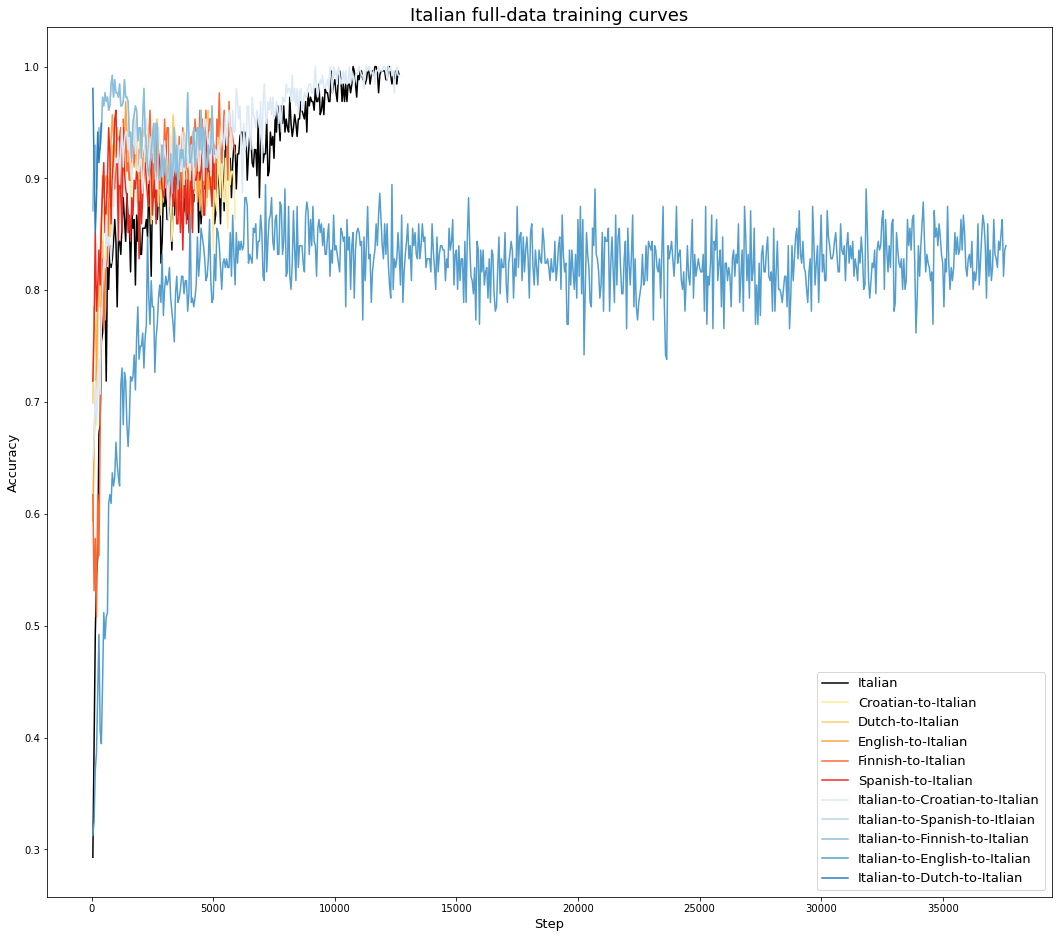

In [11]:
# Italian full-data training
plot_curves(italian_dict, 'Italian full-data training curves', save_dir='../graphs/smoothed/')
#plot_curves(italian_dict, 'Italian training curves', palette='ocean_r', fig_size=(30, 13))

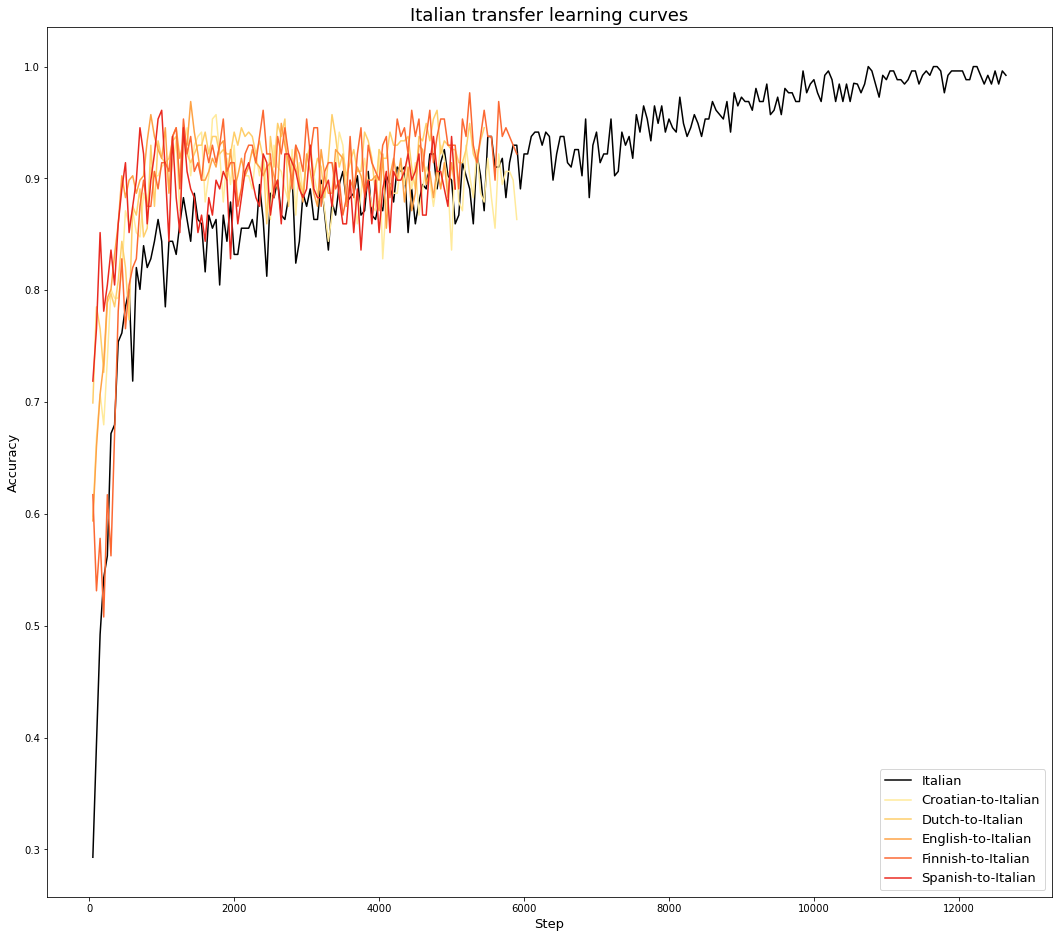

In [12]:
plot_curves(italian_transfer_learning, 'Italian transfer learning curves', save_dir='../graphs/smoothed')
#plot_curves(italian_dict, 'Italian full-data training curves', save_dir='../graphs/smoothed/')

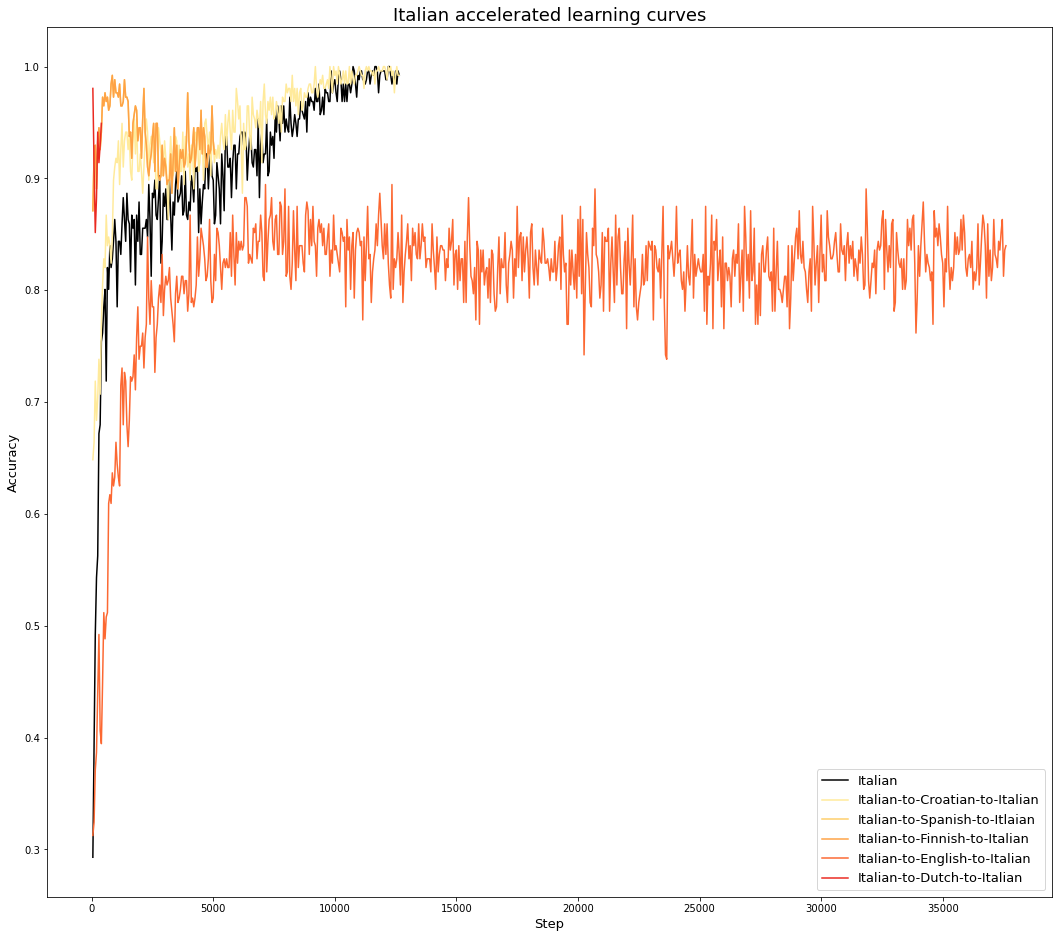

In [13]:
plot_curves(italian_accelerated_learning,
            'Italian accelerated learning curves', save_dir='../graphs/smoothed')

# Italian downsampled training

In [14]:
italian_ds = pd.read_csv(downsample_dir + 'italian_baseline_step.csv')
croatian_to_italian_ds = pd.read_csv(downsample_dir + 'croatian-to-italian-downsample-train.csv')
dutch_to_italian_ds = pd.read_csv(downsample_dir + 'dutch_italian_step.csv')
english_to_italian_ds = pd.read_csv(downsample_dir + 'english-to-italian-downsample-train.csv')
finnish_to_italian_ds = pd.read_csv(downsample_dir + 'finnish-to-spanish-downsample-train.csv')
spanish_to_italian_ds = pd.read_csv(downsample_dir + 'spanish-to-italian-downsample-train.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_italian_acc_ds = pd.read_csv(downsample_dir + 'italian_croatian_italian_step.csv')
spanish_italian_acc_ds = pd.read_csv(downsample_dir + 'italian_spanish_italian_step.csv')
finnish_italian_acc_ds = pd.read_csv(downsample_dir + 'italian_finnish_italian_step.csv')
english_italian_acc_ds = pd.read_csv(downsample_dir + 'italian_english_italian_step.csv')
dutch_italian_acc_ds = pd.read_csv(downsample_dir + 'italian_dutch_italian_step.csv')

italian_dfs_ds = [italian_ds, croatian_to_italian_ds, dutch_to_italian_ds, english_to_italian_ds,
               finnish_to_italian_ds, spanish_to_italian_ds, croatian_italian_acc_ds, spanish_italian_acc_ds,
               finnish_italian_acc_ds, english_italian_acc_ds, dutch_italian_acc_ds]

In [15]:
italian_dict_ds = dict(zip(labels, italian_dfs_ds))
italian_transfer_learning_ds = dict(zip(labels[:6], italian_dfs_ds[:6]))
italian_accelerated_learning_ds = dict(zip([labels[0]] + labels[6:], [italian_dfs_ds[0]] + italian_dfs_ds[6:]))

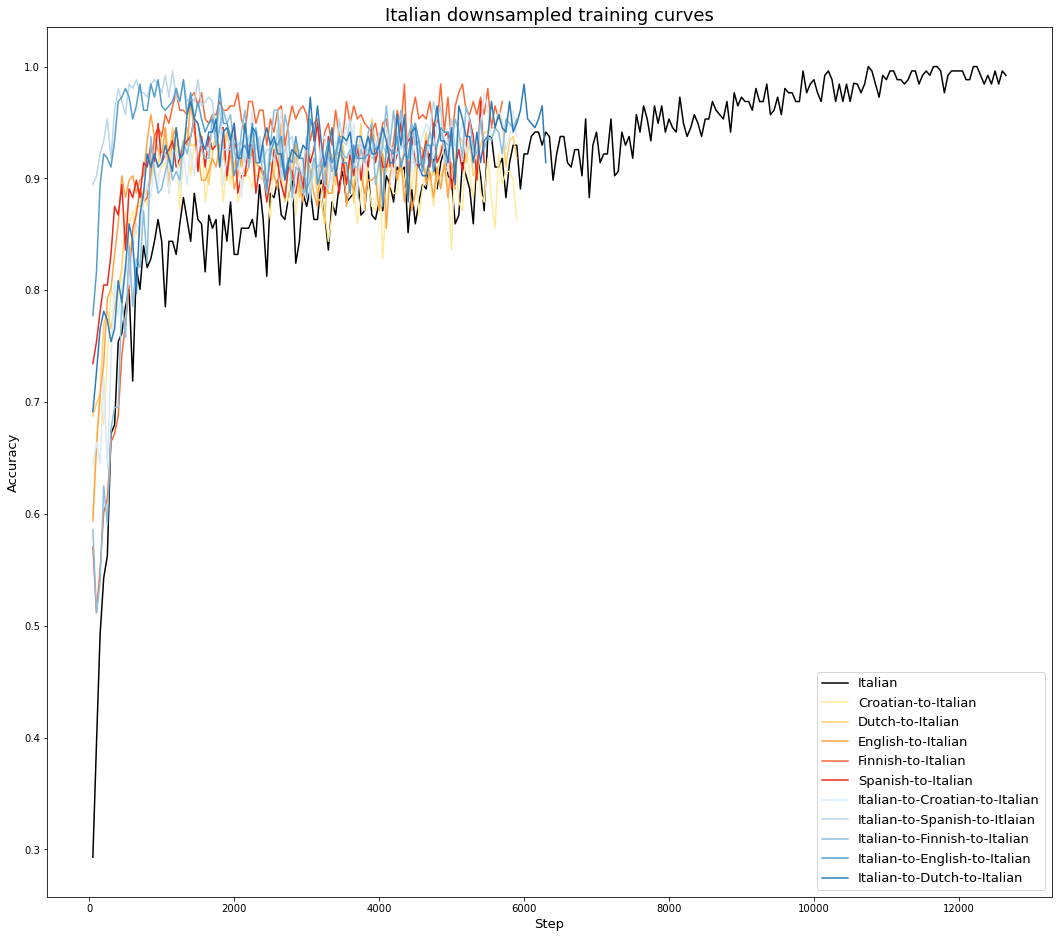

In [16]:
plot_curves(italian_dict_ds, 'Italian downsampled training curves', save_dir='../graphs/smoothed')

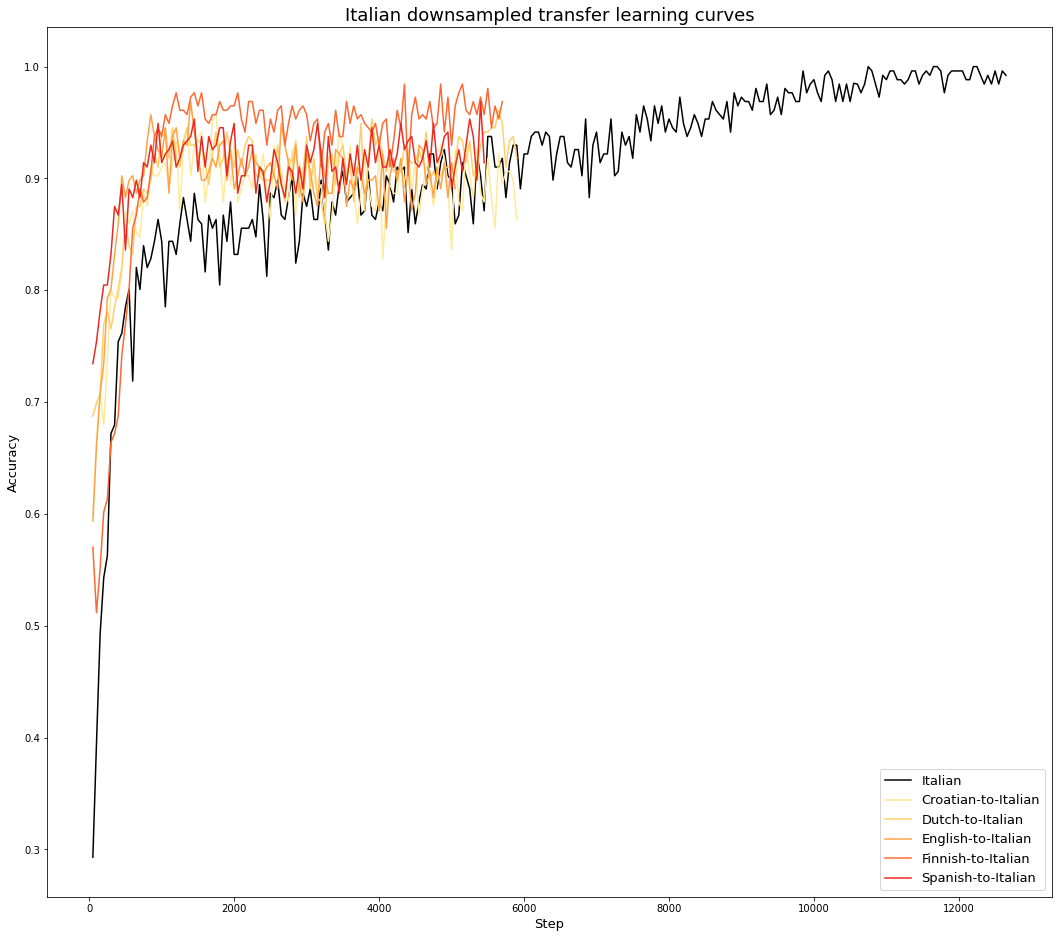

In [17]:
plot_curves(italian_transfer_learning_ds, 'Italian downsampled transfer learning curves', 
            save_dir='../graphs/smoothed')

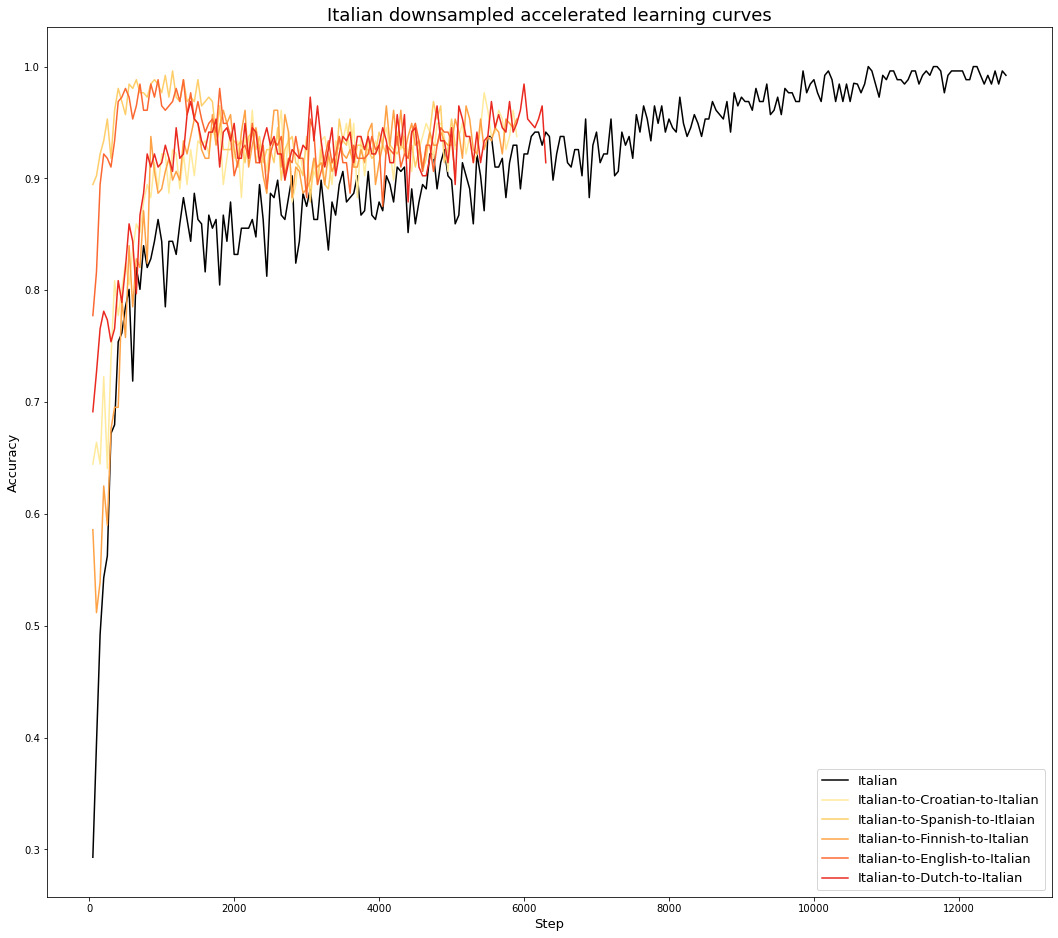

In [18]:
plot_curves(italian_accelerated_learning_ds, 'Italian downsampled accelerated learning curves',
            save_dir='../graphs/smoothed')

# Dutch full-data training

In [19]:
dutch_base = pd.read_csv(base_dir + 'dutch_baseline.csv')
croatian_to_dutch = pd.read_csv(base_dir + 'croatian-to-dutch-train_accuracy.csv')
italian_to_dutch = pd.read_csv(base_dir + 'italian_2dutch.csv')
english_to_dutch = pd.read_csv(base_dir + 'english-to-dutch-train_accuracy.csv')
finnish_to_dutch = pd.read_csv(base_dir + 'finnish-to-dutch-train_accuracy.csv')
spanish_to_dutch = pd.read_csv(base_dir + 'spanish-to-dutch-train_accuracy.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_dutch_acc = pd.read_csv(base_dir + 'dutch_croatian_dutch.csv')
spanish_dutch_acc = pd.read_csv(base_dir + 'dutch_spanish_dutch.csv')
finnish_dutch_acc = pd.read_csv(base_dir + 'dutch_finnish_dutch.csv')
english_dutch_acc = pd.read_csv(base_dir + 'dutch_english_dutch.csv')
italian_dutch_acc = pd.read_csv(base_dir + 'dutch_italian_dutch.csv')

dutch_dfs = [dutch_base, croatian_to_dutch, finnish_to_dutch, english_to_dutch,
               spanish_to_dutch, italian_to_dutch, croatian_dutch_acc, italian_dutch_acc,
               spanish_dutch_acc, english_dutch_acc, finnish_dutch_acc]

In [29]:
labels = ['Dutch', 'Croatian-to-Dutch', 'Finnish-ti-Dutch', 'English-to-Dutch', 'Spanish-to-Dutch', 
          'Italian-to-Dutch',
          'Dutch-to-Croatian-to-Dutch', 'Dutch-to-Italian-to-Dutch',
          'Dutch-to-Spanish-to-Dutch', 'Dutch-to-English-to-Dutch', 'Dutch-to-Finnish-to-Dutch']

In [30]:
dutch_dict = dict(zip(labels, dutch_dfs))
dutch_transfer_learning = dict(zip(labels[:6], dutch_dfs[:6]))
dutch_accelerated_learning = dict(zip([labels[0]] + labels[6:], [dutch_dfs[0]] + dutch_dfs[6:]))

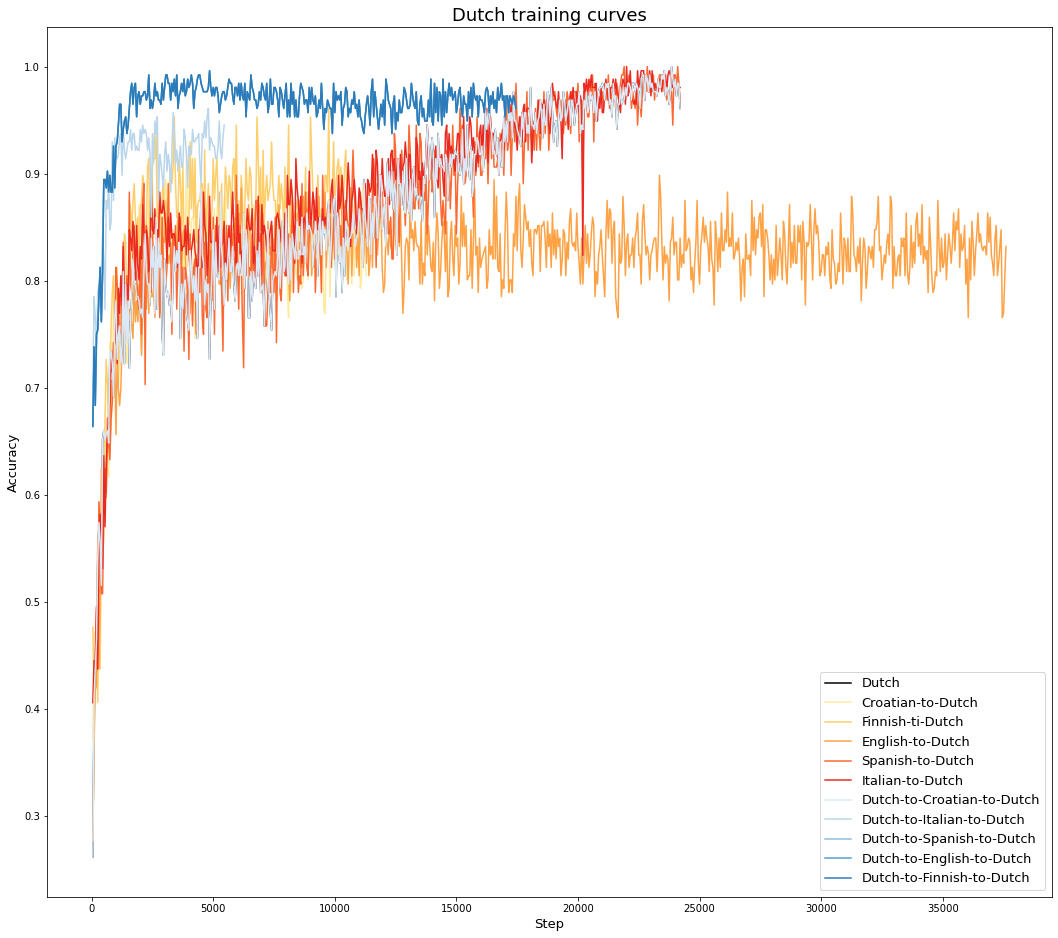

In [31]:
plot_curves(dutch_dict, 'Dutch training curves', save_dir='../graphs/smoothed')

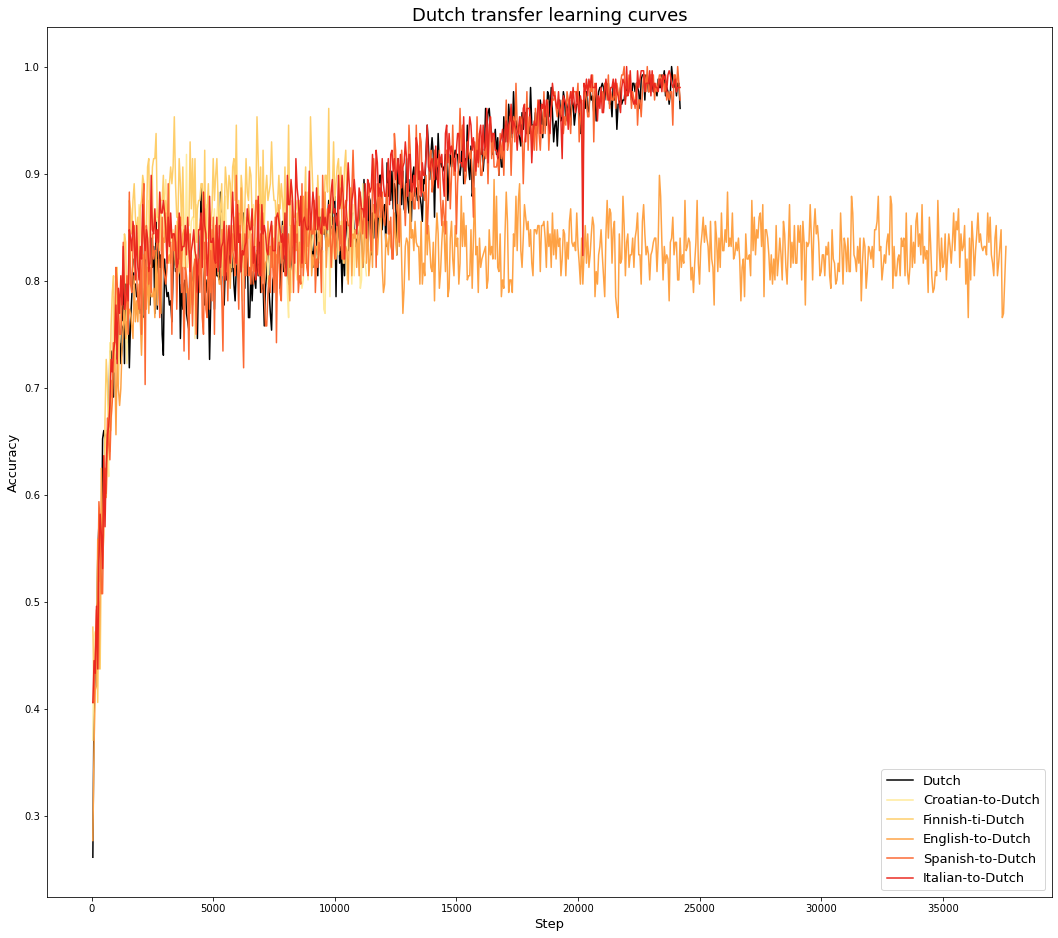

In [32]:
plot_curves(dutch_transfer_learning, 'Dutch transfer learning curves', save_dir='../graphs/smoothed')

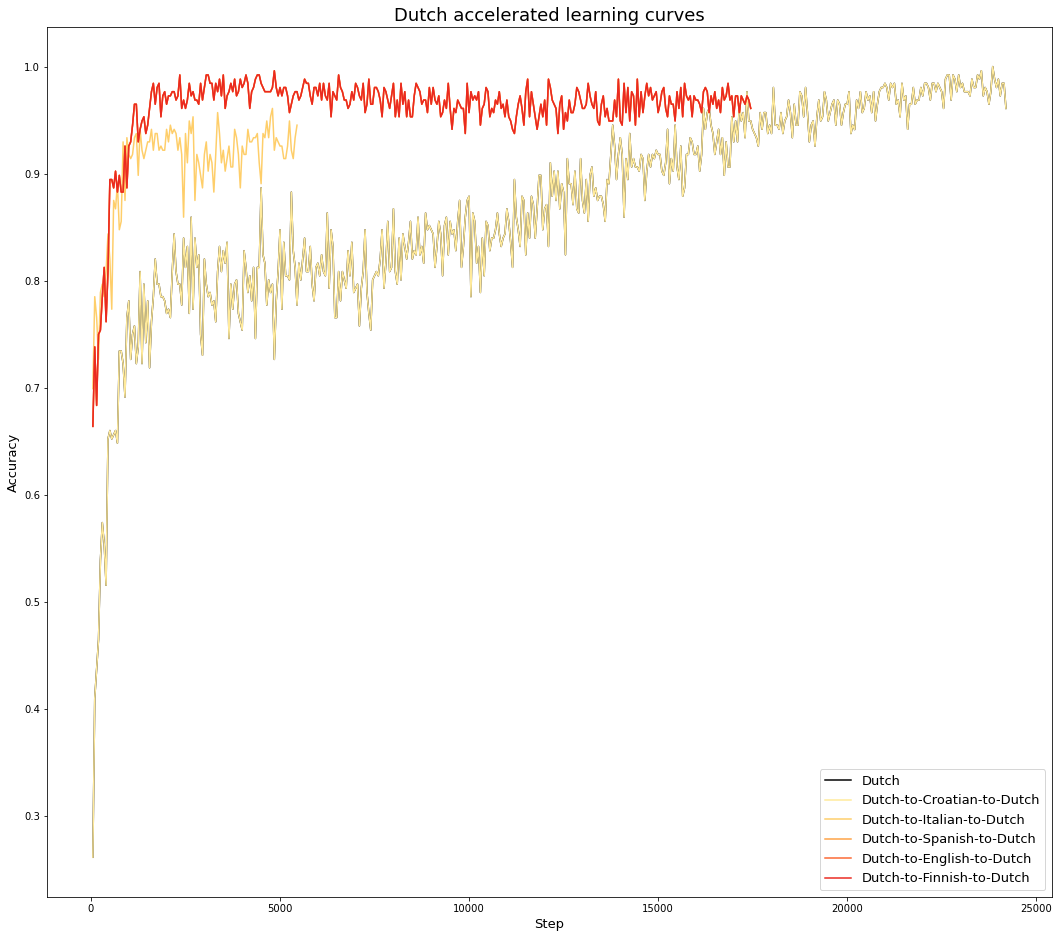

In [33]:
plot_curves(dutch_accelerated_learning, 'Dutch accelerated learning curves', 
            save_dir='../graphs/smoothed')

In [26]:
dutch_ds = pd.read_csv(downsample_dir + 'dutch_baseline_step.csv')
croatian_to_dutch_ds = pd.read_csv(downsample_dir + 'croatian-to-dutch-downsample-train.csv')
finnish_to_dutch_ds = pd.read_csv(downsample_dir + 'finnish-to-dutch-downsample-train.csv')
english_to_dutch_ds = pd.read_csv(downsample_dir + 'english-to-dutch-downsample-train.csv')
spanish_to_dutch_ds = pd.read_csv(downsample_dir + 'spanish-to-dutch-downsample-train.csv')
italian_to_dutch_ds = pd.read_csv(downsample_dir + 'italian_dutch_step.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_dutch_acc_ds = pd.read_csv(downsample_dir + 'dutch_croatian_dutch_step.csv')
italian_dutch_acc_ds = pd.read_csv(downsample_dir + 'dutch_italian_dutch_step.csv')
spanish_dutch_acc_ds = pd.read_csv(downsample_dir + 'dutch_spanish_dutch_step.csv')
english_dutch_acc_ds = pd.read_csv(downsample_dir + 'dutch_english_dutch_step.csv')
finnish_dutch_acc_ds = pd.read_csv(downsample_dir + 'dutch_finnish_dutch_step.csv')

dutch_dfs_ds = [dutch_ds, croatian_to_dutch_ds, finnish_to_dutch_ds, english_to_dutch_ds,
               spanish_to_dutch_ds, italian_to_dutch_ds, croatian_dutch_acc_ds, italian_dutch_acc_ds,
               spanish_dutch_acc_ds, english_dutch_acc_ds, finnish_dutch_acc_ds]

In [34]:
dutch_dict_ds = dict(zip(labels, dutch_dfs_ds))
dutch_transfer_learning_ds = dict(zip(labels[:6], dutch_dfs_ds[:6]))
dutch_accelerated_learning_ds = dict(zip([labels[0]] + labels[6:], [dutch_dfs_ds[0]] + dutch_dfs_ds[6:]))

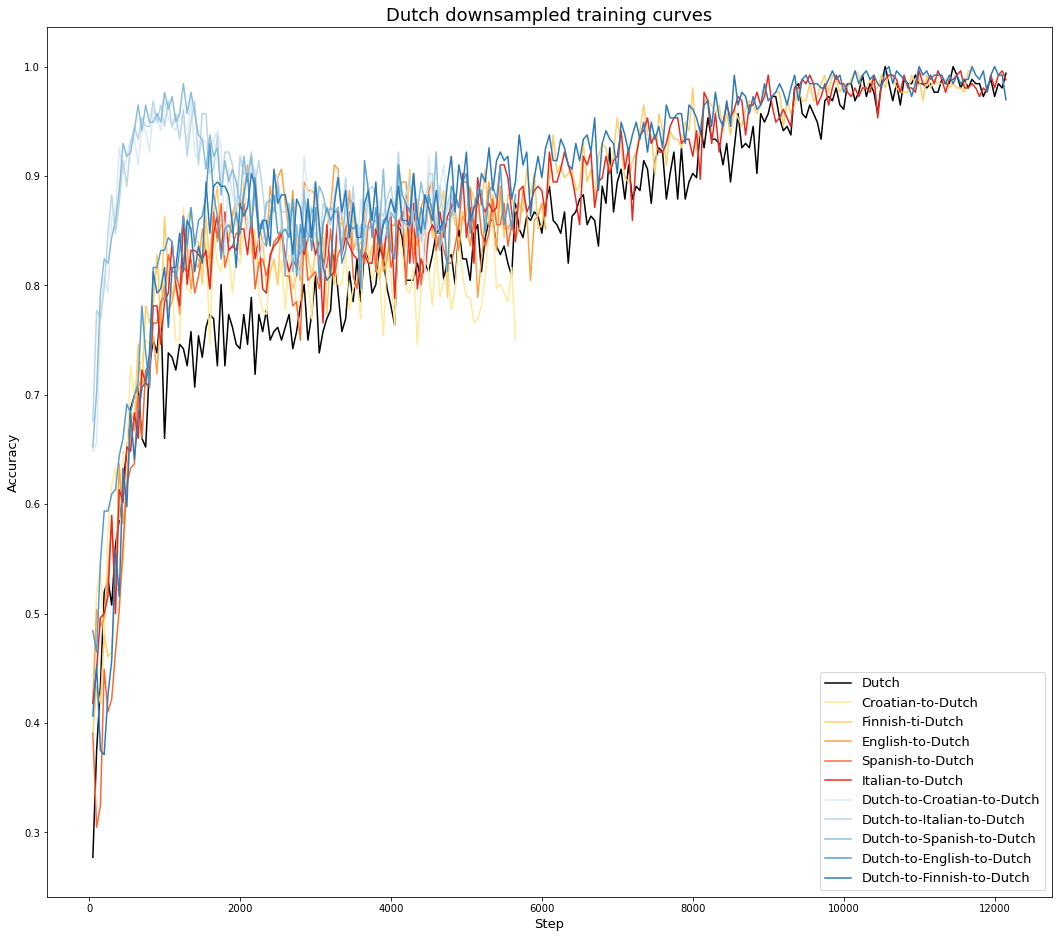

In [36]:
plot_curves(dutch_dict_ds, 'Dutch downsampled training curves', save_dir='../graphs/smoothed')

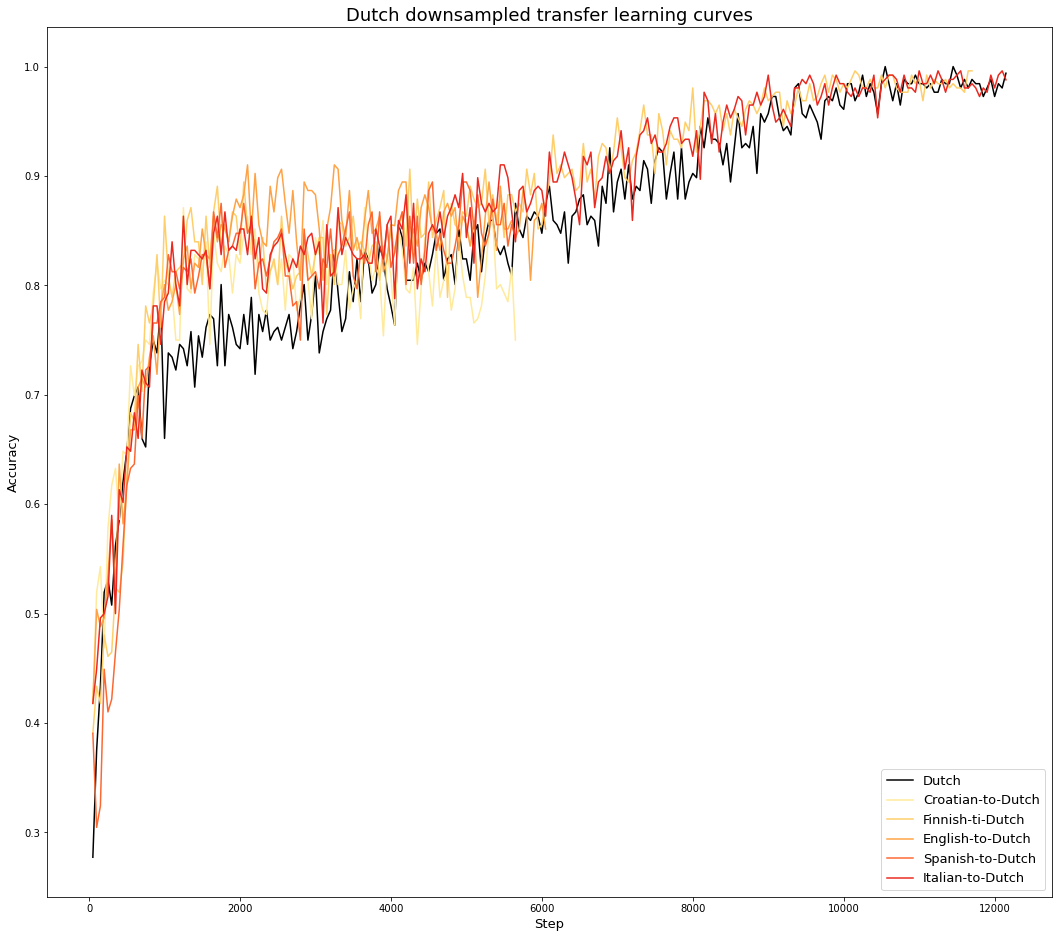

In [37]:
plot_curves(dutch_transfer_learning_ds, 'Dutch downsampled transfer learning curves',
            save_dir='../graphs/smoothed')

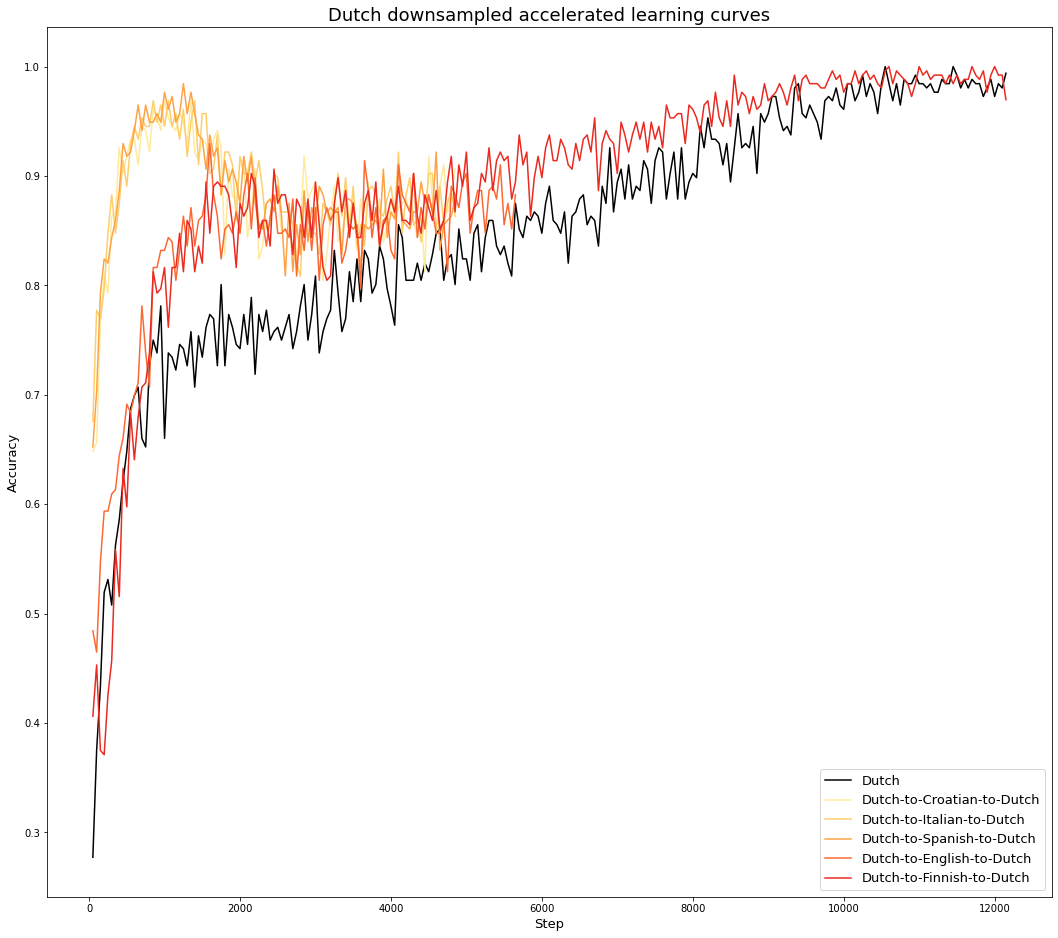

In [38]:
plot_curves(dutch_accelerated_learning_ds, 'Dutch downsampled accelerated learning curves', 
            save_dir='../graphs/')


# Validation

## Spanish full-data validation

In [82]:
base_dir = '../data/validation_curves/base-training/'
downsample_dir = '../data/validation_curves/downsampled-training/'

In [83]:
italian_base = pd.read_csv(base_dir + 'italian_val.csv')
#croatian_to_italian = pd.read_csv(base_dir + 'croatian-to-italian-validation.csv')
dutch_to_italian = pd.read_csv(base_dir + 'dutch_italian_val.csv')
#english_to_italian = pd.read_csv(base_dir + 'english-to-italian-validation.csv')
finnish_to_italian = pd.read_csv(base_dir + 'finnish-to-italian-validation.csv')
spanish_to_italian = pd.read_csv(base_dir + 'spanish-to-italian-validation.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_italian_acc = pd.read_csv(base_dir + 'italian_croatian_italian_val.csv')
spanish_italian_acc = pd.read_csv(base_dir + 'italian_spanish_italian_val.csv')
finnish_italian_acc = pd.read_csv(base_dir + 'italian_finnish_italian_val.csv')
english_italian_acc = pd.read_csv(base_dir + 'italian_english_italian_val.csv')
dutch_italian_acc = pd.read_csv(base_dir + 'italian_dutch_italian_val.csv')

italian_dfs = [italian_base, croatian_to_italian, dutch_to_italian, english_to_italian,
               finnish_to_italian, spanish_to_italian, croatian_italian_acc, spanish_italian_acc,
               finnish_italian_acc, english_italian_acc, dutch_italian_acc]

italian_dfs = [italian_base, dutch_to_italian,
               finnish_to_italian, spanish_to_italian, croatian_italian_acc, spanish_italian_acc,
               finnish_italian_acc, english_italian_acc, dutch_italian_acc]


In [52]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [84]:
base_dir = '../data/validation_curves/base-training/smoothed/'
downsample_dir = '../data/validation_curves/downsampled-training/smoothed/'

In [85]:
file_names = ['italian_val.csv','dutch_italian_val.csv','italian_croatian_italian_val.csv',
             'italian_spanish_italian_val.csv', 'italian_finnish_italian_val.csv',
             'italian_english_italian_val.csv','italian_dutch_italian_val.csv']

In [86]:
italian_files = dict(zip(file_names, italian_dfs))

In [87]:
for idx, item in enumerate(italian_files.items()):
    label, df = item
    df.columns = ['wall_time', 'step', 'accuracy']
    df.head()
    smoothed = smooth(df['accuracy'], .6)
    df['accuracy'] = smoothed
    df.to_csv(base_dir+label,index=False)

In [88]:
italian_base = pd.read_csv(base_dir + 'italian_val.csv')
#croatian_to_italian = pd.read_csv(base_dir + 'croatian-to-italian-validation.csv')
dutch_to_italian = pd.read_csv(base_dir + 'dutch_italian_val.csv')
#english_to_italian = pd.read_csv(base_dir + 'english-to-italian-validation.csv')
finnish_to_italian = pd.read_csv(base_dir + 'finnish-to-italian-validation.csv')
spanish_to_italian = pd.read_csv(base_dir + 'spanish-to-italian-validation.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_italian_acc = pd.read_csv(base_dir + 'italian_croatian_italian_val.csv')
spanish_italian_acc = pd.read_csv(base_dir + 'italian_spanish_italian_val.csv')
finnish_italian_acc = pd.read_csv(base_dir + 'italian_finnish_italian_val.csv')
english_italian_acc = pd.read_csv(base_dir + 'italian_english_italian_val.csv')
dutch_italian_acc = pd.read_csv(base_dir + 'italian_dutch_italian_val.csv')

# italian_dfs = [italian_base, croatian_to_italian, dutch_to_italian, english_to_italian,
#                finnish_to_italian, spanish_to_italian, croatian_italian_acc, spanish_italian_acc,
#                finnish_italian_acc, english_italian_acc, dutch_italian_acc]

italian_dfs = [italian_base, dutch_to_italian,
               finnish_to_italian, spanish_to_italian, croatian_italian_acc, spanish_italian_acc,
               finnish_italian_acc, english_italian_acc, dutch_italian_acc]

In [89]:
labels = ['Italian', 'Croatian-to-Italian', 'Dutch-to-Italian', 'English-to-Italian', 'Finnish-to-Italian', 
          'Spanish-to-Italian',
          'Italian-to-Croatian-to-Italian', 'Italian-to-Spanish-to-Itlaian',
          'Italian-to-Finnish-to-Italian', 'Italian-to-English-to-Italian', 
          'Italian-to-Dutch-to-Italian']

In [90]:
italian_dict = dict(zip(labels, italian_dfs))
italian_transfer_learning = dict(zip(labels[:6], italian_dfs[:6]))
italian_accelerated_learning = dict(zip([labels[0]] + labels[6:], [italian_dfs[0]] + italian_dfs[6:]))

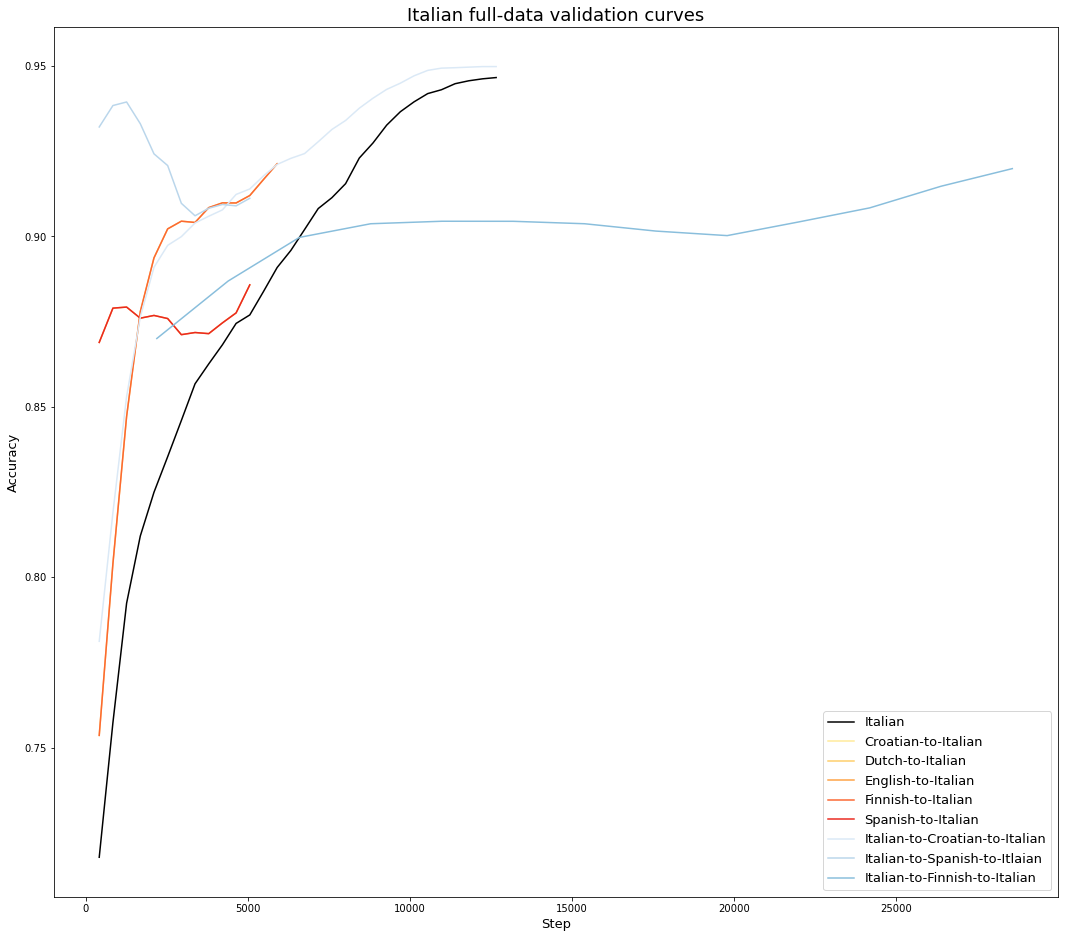

In [91]:
plot_curves(italian_dict, 'Italian full-data validation curves', save_dir='../graphs/smoothed/')

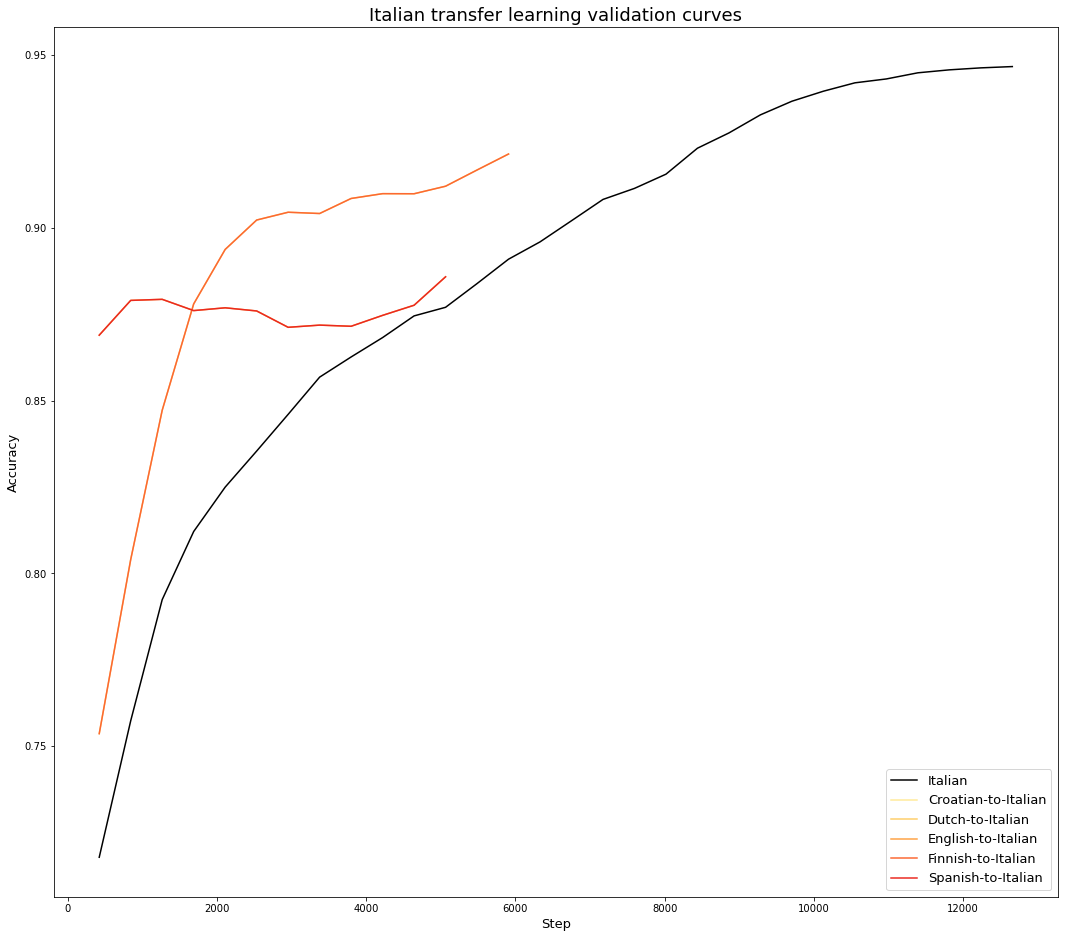

In [92]:
plot_curves(italian_transfer_learning, 'Italian transfer learning validation curves', save_dir='../graphs/smoothed')

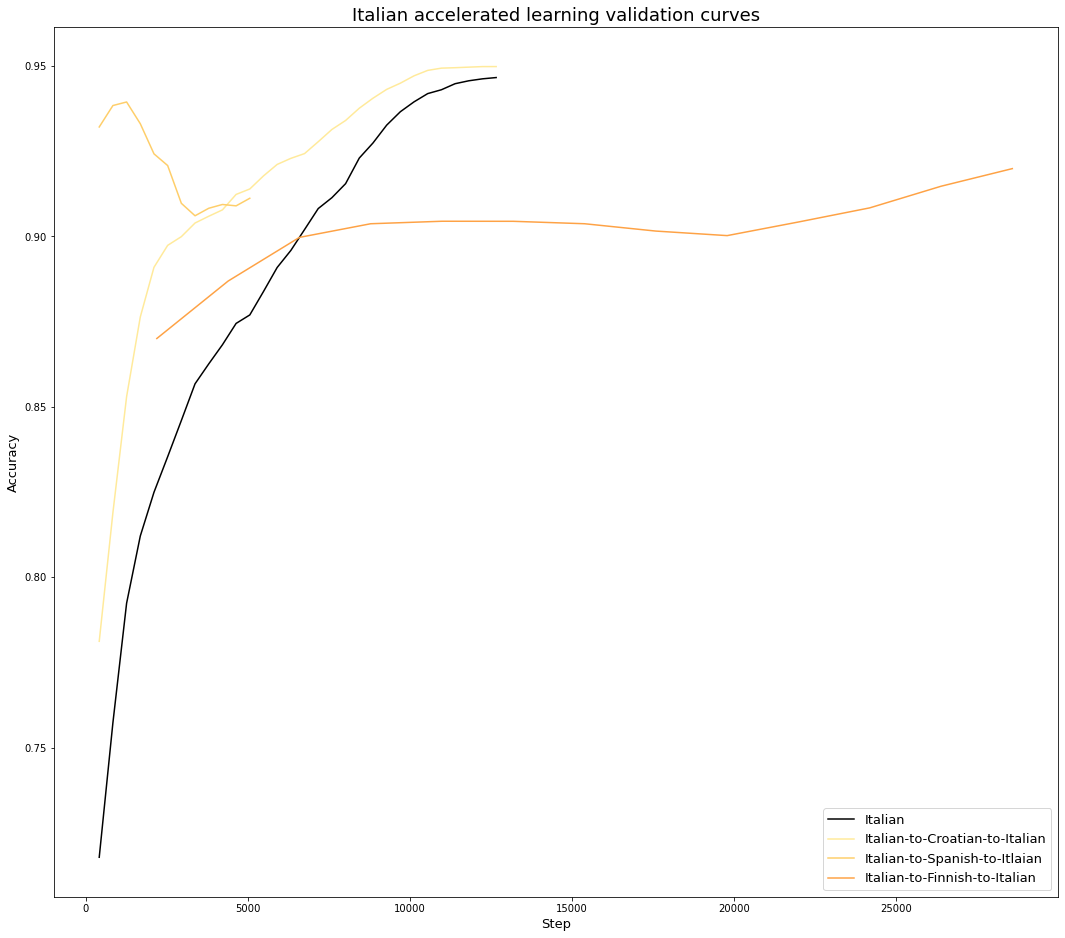

In [93]:
plot_curves(italian_accelerated_learning,
            'Italian accelerated learning validation curves', save_dir='../graphs/smoothed')

## Italian Downsample Validation

In [ ]:
italian_base = pd.read_csv(base_dir + 'italian_val.csv')
#croatian_to_italian = pd.read_csv(base_dir + 'croatian-to-italian-validation.csv')
dutch_to_italian = pd.read_csv(base_dir + 'dutch_italian_val_ds.csv')
#english_to_italian = pd.read_csv(base_dir + 'english-to-italian-validation.csv')
finnish_to_italian = pd.read_csv(base_dir + 'finnish-to-italian-validation.csv')
spanish_to_italian = pd.read_csv(base_dir + 'spanish-to-italian-validation.csv')

# to avoid lengthy variable names, below correspond to 
# instances of having first trained on spanish. transfer learned to another language
# then returned to spanish for observing accelerated learning.
croatian_italian_acc = pd.read_csv(base_dir + 'italian_croatian_italian_val.csv')
spanish_italian_acc = pd.read_csv(base_dir + 'italian_spanish_italian_val.csv')
finnish_italian_acc = pd.read_csv(base_dir + 'italian_finnish_italian_val.csv')
english_italian_acc = pd.read_csv(base_dir + 'italian_english_italian_val.csv')
dutch_italian_acc = pd.read_csv(base_dir + 'italian_dutch_italian_val.csv')

# italian_dfs = [italian_base, croatian_to_italian, dutch_to_italian, english_to_italian,
#                finnish_to_italian, spanish_to_italian, croatian_italian_acc, spanish_italian_acc,
#                finnish_italian_acc, english_italian_acc, dutch_italian_acc]

italian_dfs = [italian_base, croatian_to_italian, dutch_to_italian, english_to_italian,
               finnish_to_italian, spanish_to_italian, croatian_italian_acc, spanish_italian_acc,
               finnish_italian_acc, english_italian_acc, dutch_italian_acc]